In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import string
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from afinn import Afinn
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.lancaster import LancasterStemmer
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#lettura del csv
reviews = pd.read_csv("dataset_ent_sent.csv")

#settare questo campo nel caso in cui il testo dei commenti sia molto lungo
pd.set_option('display.max_colwidth', -1)

notes = list(reviews.body.values)

In [0]:
import re

regex_str = [
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-zA-Z][a-zA-Z-_]+[a-zA-Z])", # words with -
    r"(?:[a-zA-Z][a-zA-Z'])", # words with '
]

WORD = re.compile(r'('+'|'.join(regex_str)+')')
#WORD = re.compile(r'\w+')

def regTokenize(text):
    words = WORD.findall(text)
    return words

In [0]:
#Esempio

s0 = "@remy This dell'amico is , a cooool 3 $ self-diving https://www.youtube.com/ #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
token = regTokenize(s0)
token

['remy',
 'This',
 'dell',
 'amico',
 'is',
 'cooool',
 '3',
 'self-diving',
 'https://www.youtube.com/',
 'dummysmiley',
 '3',
 'and',
 'some',
 'arrows']

In [0]:
#Tokenizzazione

i = 0
for x in reviews["body"]:
    token = regTokenize(x)
    reviews["body"][i] = token
    i = i+1
print(reviews["body"])

C:\Users\marti\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         [Non, ho, mai, scritto, una, recensione, in, vita, mia, ma, per, questo, gioco, sento, proprio, il, bisogno, di, scriverci, qualcosa, Parto, consigliando, tutti, di, non, acquistare, questo, gioco, perch, BUTTATE, vostri, soldi, Sono, arrivato, questa, conclusione, semplicemente, perch, che, tu, sia, bravo, meno, non, importa, il, gioco, che, decide, per, te, tra, 8, 9, gol, partita, errori, assurdi, fatti, dalla, cpu, il, tuo, giocare, passa, in, secondo, piano, Ormai, credo, che, la, EA, preferisca, arricchirsi, con, vendite, di, giochi, fifa, points, senza, pensare, minimamente, al, gamplay, rendere, il, prodotto, giocabile, Gioco, Fifa, da, ormai, 7, 8, anni, credo, che, questo, ...]                                     
1         [Uno, dei, peggiori, se, non, il, peggior, gioco, Fifa, degli, ultimi, anni, dovrebbe, essere, il, gioco, di, calcio, pi, realistico, al, mondo, ma, quello, che, ho, visto, nei, tiri, nei, passaggi, negli, interventi, della, cpu, pura, fantascien

In [0]:
#Da uppercase a lowercase
lowered_text = reviews["body"].apply(lambda x: [item.lower() for item in x])
lowered_text

0         [non, ho, mai, scritto, una, recensione, in, vita, mia, ma, per, questo, gioco, sento, proprio, il, bisogno, di, scriverci, qualcosa, parto, consigliando, tutti, di, non, acquistare, questo, gioco, perch, buttate, vostri, soldi, sono, arrivato, questa, conclusione, semplicemente, perch, che, tu, sia, bravo, meno, non, importa, il, gioco, che, decide, per, te, tra, 8, 9, gol, partita, errori, assurdi, fatti, dalla, cpu, il, tuo, giocare, passa, in, secondo, piano, ormai, credo, che, la, ea, preferisca, arricchirsi, con, vendite, di, giochi, fifa, points, senza, pensare, minimamente, al, gamplay, rendere, il, prodotto, giocabile, gioco, fifa, da, ormai, 7, 8, anni, credo, che, questo, ...]                                     
1         [uno, dei, peggiori, se, non, il, peggior, gioco, fifa, degli, ultimi, anni, dovrebbe, essere, il, gioco, di, calcio, pi, realistico, al, mondo, ma, quello, che, ho, visto, nei, tiri, nei, passaggi, negli, interventi, della, cpu, pura, fantascien

In [0]:
stop = stopwords.words("italian")
stop = set(stop)
stop.add("l'")
stop.add("c'")

f = open("Stopwords.txt","r")
lines = f.readlines()
result = []
for x in lines:
    result.append(x)
f.close()

for i in result:
    val = re.sub('[^A-Za-z0-9]+', '', i)
    stop.add(val)

#Tolgo le stopwords    
stopword_removed_text = lowered_text.apply(lambda x: [item for item in x if item not in stop])
stopword_removed_text

0         [scritto, recensione, gioco, sento, bisogno, scriverci, parto, consigliando, acquistare, gioco, buttate, soldi, arrivato, conclusione, semplicemente, bravo, meno, importa, gioco, decide, 8, 9, gol, partita, errori, assurdi, fatti, cpu, giocare, passa, secondo, piano, ormai, credo, ea, preferisca, arricchirsi, vendite, giochi, fifa, points, pensare, minimamente, gamplay, rendere, prodotto, giocabile, gioco, fifa, ormai, 7, 8, anni, credo, peggiore, molto, deluso, auguri, tutte, persone, compreranno, gioco, divertirsi]                                                                                                                                                                                                                                                                                                   
1         [peggiori, peggior, gioco, fifa, ultimi, anni, dovrebbe, gioco, calcio, pi, realistico, mondo, tiri, passaggi, interventi, cpu, pura, fantascienza, rimasto, soddisfat

In [0]:
#Tolgo le parole minori di 3
#stopword_removed_text = stopword_removed_text.apply(lambda x: [item for item in x if len(item) >= 3])
#print(stopword_removed_text[0:10])

In [0]:
#Tolgo le cifre numeriche
preprocessed_text = stopword_removed_text.apply(lambda x: [item for item in x if not item.isdigit()]) 
preprocessed_text

0         [scritto, recensione, gioco, sento, bisogno, scriverci, parto, consigliando, acquistare, gioco, buttate, soldi, arrivato, conclusione, semplicemente, bravo, meno, importa, gioco, decide, gol, partita, errori, assurdi, fatti, cpu, giocare, passa, secondo, piano, ormai, credo, ea, preferisca, arricchirsi, vendite, giochi, fifa, points, pensare, minimamente, gamplay, rendere, prodotto, giocabile, gioco, fifa, ormai, anni, credo, peggiore, molto, deluso, auguri, tutte, persone, compreranno, gioco, divertirsi]                                                                                                                                                                                                                                                                                                                                                            
1         [peggiori, peggior, gioco, fifa, ultimi, anni, dovrebbe, gioco, calcio, pi, realistico, mondo, tiri, passaggi, interventi

In [0]:
from nltk.stem.snowball import SnowballStemmer
ita_stemmer = SnowballStemmer("italian")

tokenized_stemming = preprocessed_text.apply(lambda x: [ita_stemmer.stem(item) for item in x])
tokenized_stemming

#lancaster_stemmer = LancasterStemmer()

#tokenized_stemming = preprocessed_text.apply(lambda x: [lancaster_stemmer.stem(item) for item in x])
#tokenized_stemming.head(10)

0         [scritt, recension, gioc, sent, bisogn, scriv, part, consigl, acquist, gioc, butt, sold, arriv, conclusion, semplic, brav, men, import, gioc, decid, gol, part, error, assurd, fatt, cpu, gioc, pass, second, pian, orma, cred, ea, prefer, arricc, vend, gioc, fif, points, pens, minim, gamplay, rend, prodott, giocabil, gioc, fif, orma, anni, cred, peggior, molt, delus, augur, tutt, person, compr, gioc, divert]                                                                                                                                                                                                                                                                                                                 
1         [peggior, peggior, gioc, fif, ultim, anni, dovrebb, gioc, calc, pi, realist, mond, tir, passagg, intervent, cpu, pur, fantascit, rimast, soddisfatt, nemmen, precedent, capitol, fif, ora, ora, rimpiang, risparm, sold, almen, fin, introdurrann, fix, bug, mes, scritt, 

In [0]:
tokenizedDataset = pd.DataFrame()
tokenizedDataset["tokens_stemming"] = tokenized_stemming
tokenizedDataset["tokens"] = preprocessed_text
tokenizedDataset.to_csv(r'.\tokenizedDataset.csv')

In [0]:
sentences = (list(itertools.chain(preprocessed_text)))
flat_list = [item for sublist in sentences for item in sublist]
c = Counter(flat_list)
c.most_common(10)

[('molto', 33449),
 ('pi', 27925),
 ('gioco', 25846),
 ('libro', 24851),
 ('film', 21091),
 ('ottimo', 16589),
 ('arrivato', 12854),
 ('consiglio', 12701),
 ('prodotto', 12409),
 ('storia', 11658)]

(-0.5, 399.5, 199.5, -0.5)

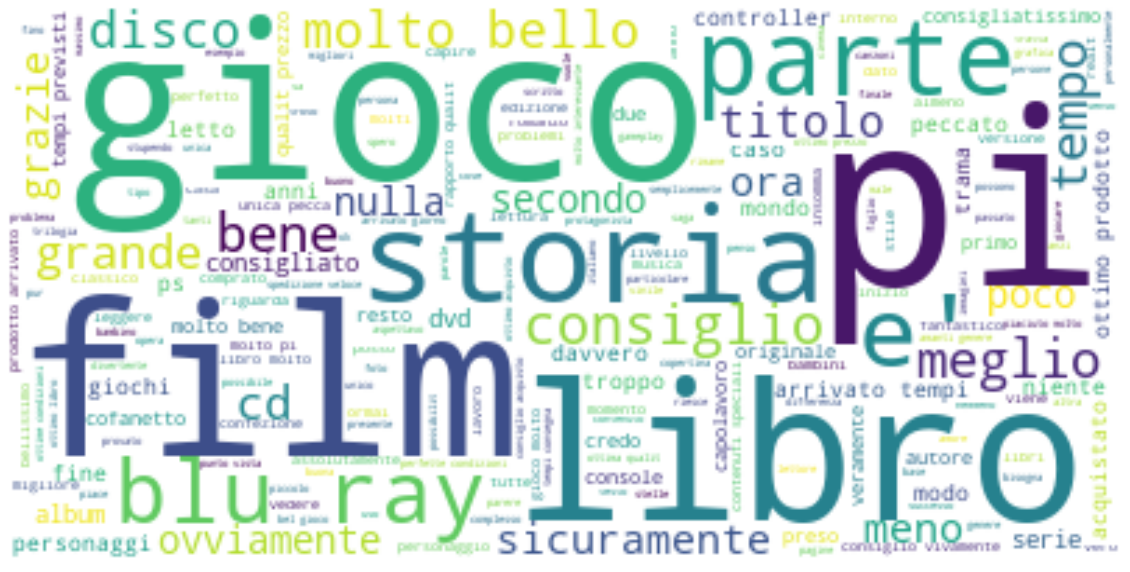

In [0]:
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")